# How to use Control toolbox in Python

In [28]:
try:
    from control.matlab import *
except:
    !python3 -m pip install control
    from control.matlab import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

In [29]:
# define P as a transfer function
P = tf([0, 4],[1,2,3])
P

TransferFunction(array([4]), array([1, 2, 3]))

In [30]:
# Second approach
s = tf('s')
P = 4/(s**2 + 2*s + 3)
P

TransferFunction(array([4]), array([1, 2, 3]))

In [31]:
# third approach
A = [[0, 1],[-3, -2]]
B = [[0],[1]]
C = [[4, 0],[0, 1]]
D = [[0],[0]]
Pss = ss(A,B,C,D)
Pss

<LinearIOSystem:sys[240]:['u[0]']->['y[0]', 'y[1]']>

In [32]:
P = ss2tf(A,B,C[0][:],D[0][:]) # to be consistent with the above
for ii in range(len(P.num[0][0][:])):
    if abs(P.num[0][0][ii]) < 1e-12:
        P.num[0][0][ii] = 0
    else:
        P.num[0][0][ii] = P.num[0][0][ii]
P

TransferFunction(array([0., 4.]), array([1., 2., 3.]))

In [33]:
# Try some plotting

In [34]:
t = np.arange(0,10,0.01)
y,t = impulse(Pss,t)

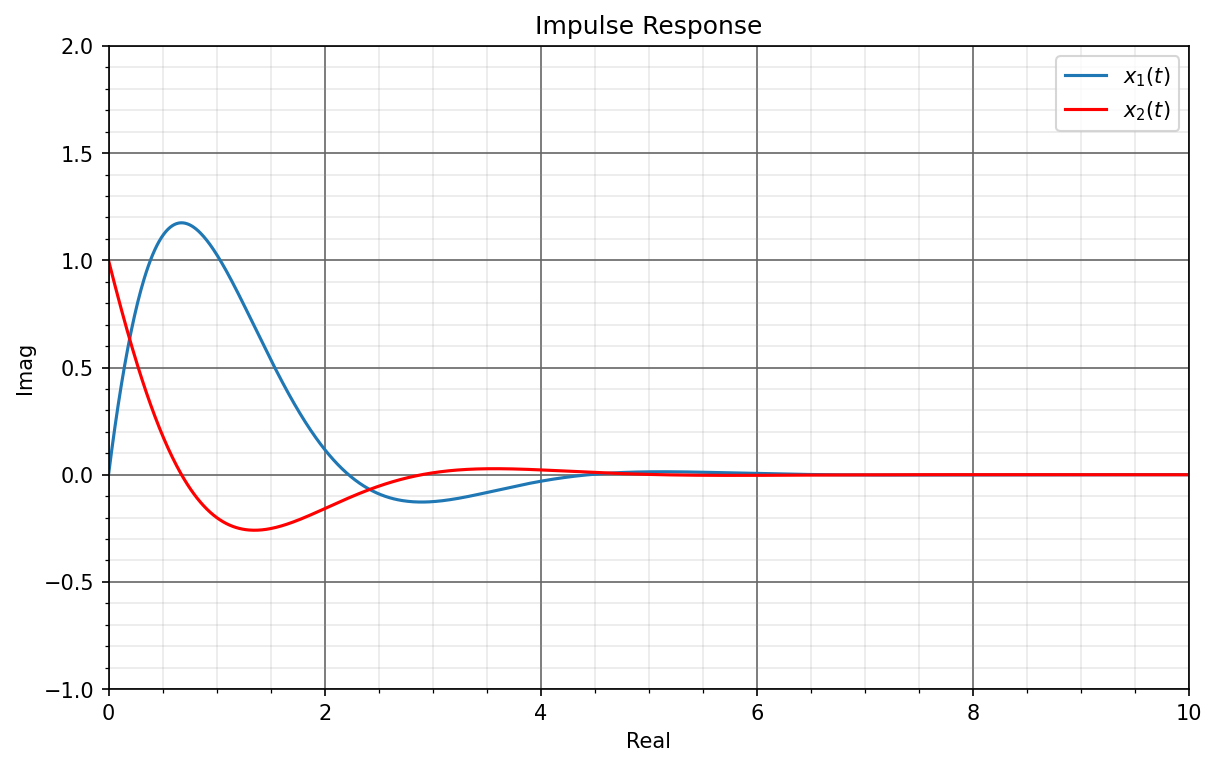

In [35]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Impulse Response')
plt.show()

In [36]:
t = np.arange(0,10,0.01)
y,t = step(Pss,t)

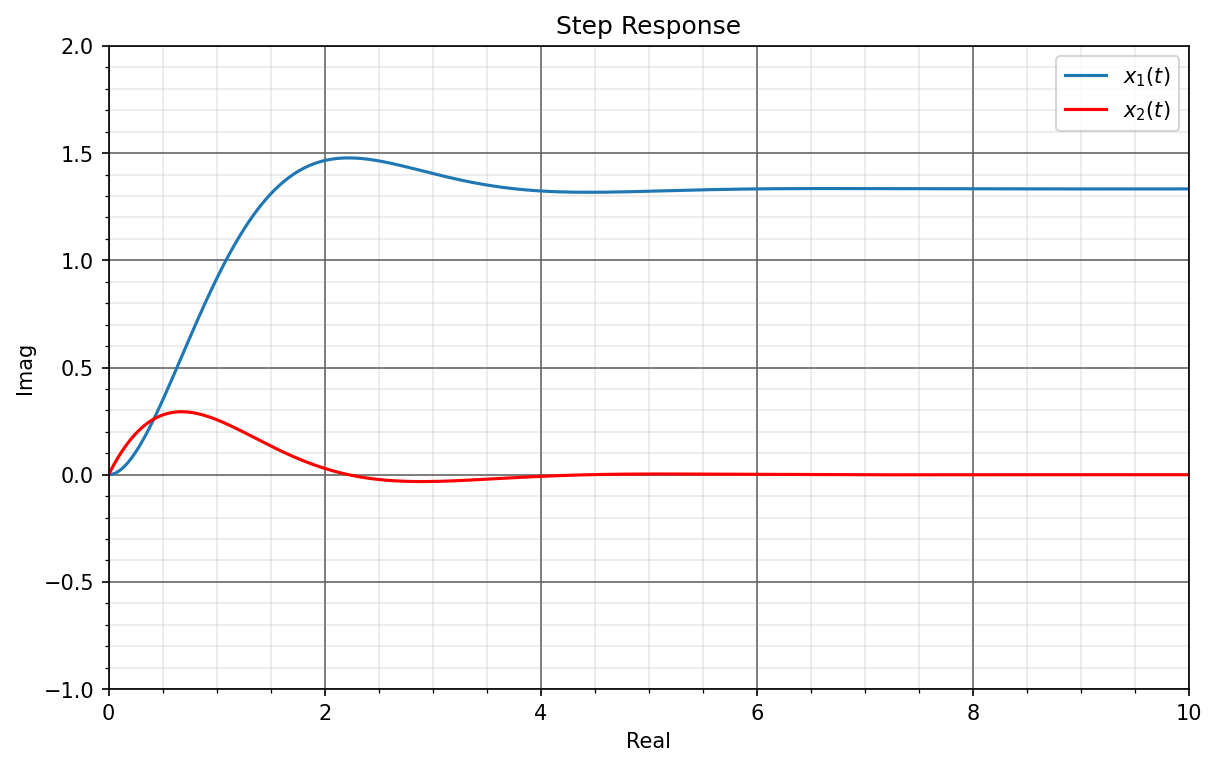

In [37]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Step Response')
plt.show()


In [38]:
X0 = [0, -1]
y,t = initial(Pss,t,X0)

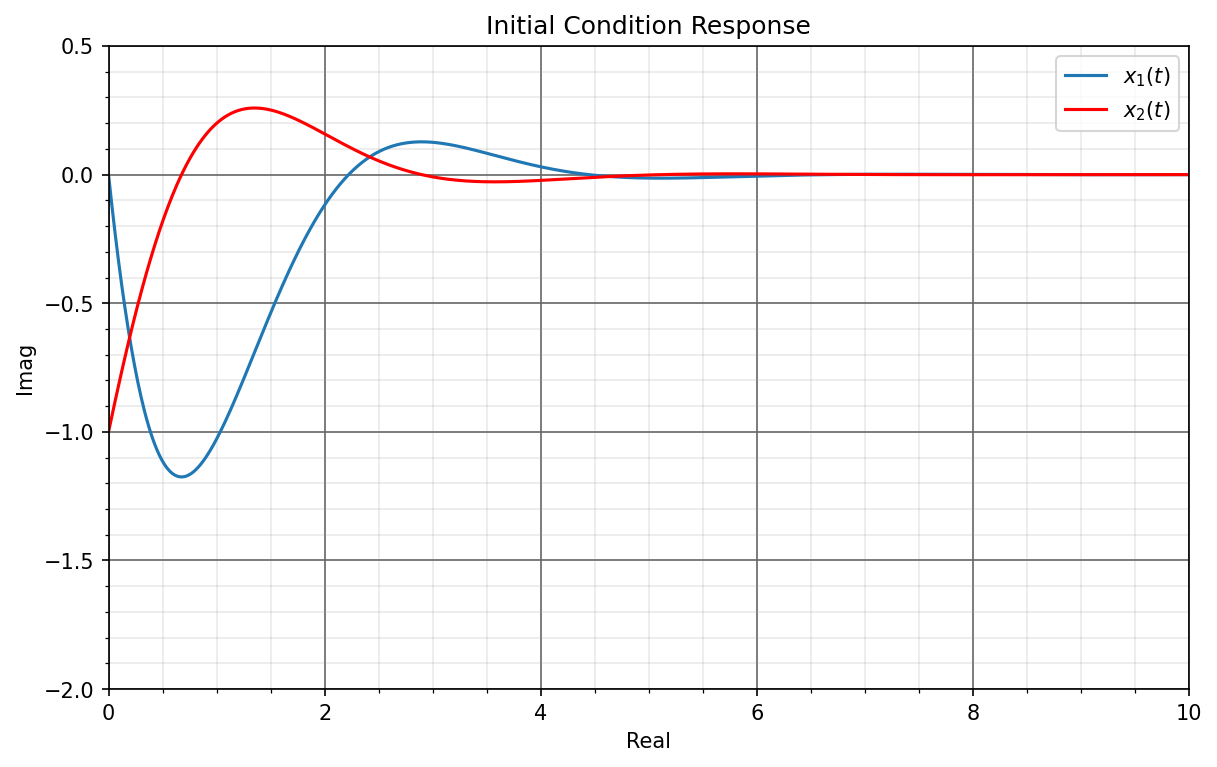

In [39]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()


In [40]:
U = np.sin(5*2*np.pi*t)
y,t,xout = lsim(Pss,U,t,X0)

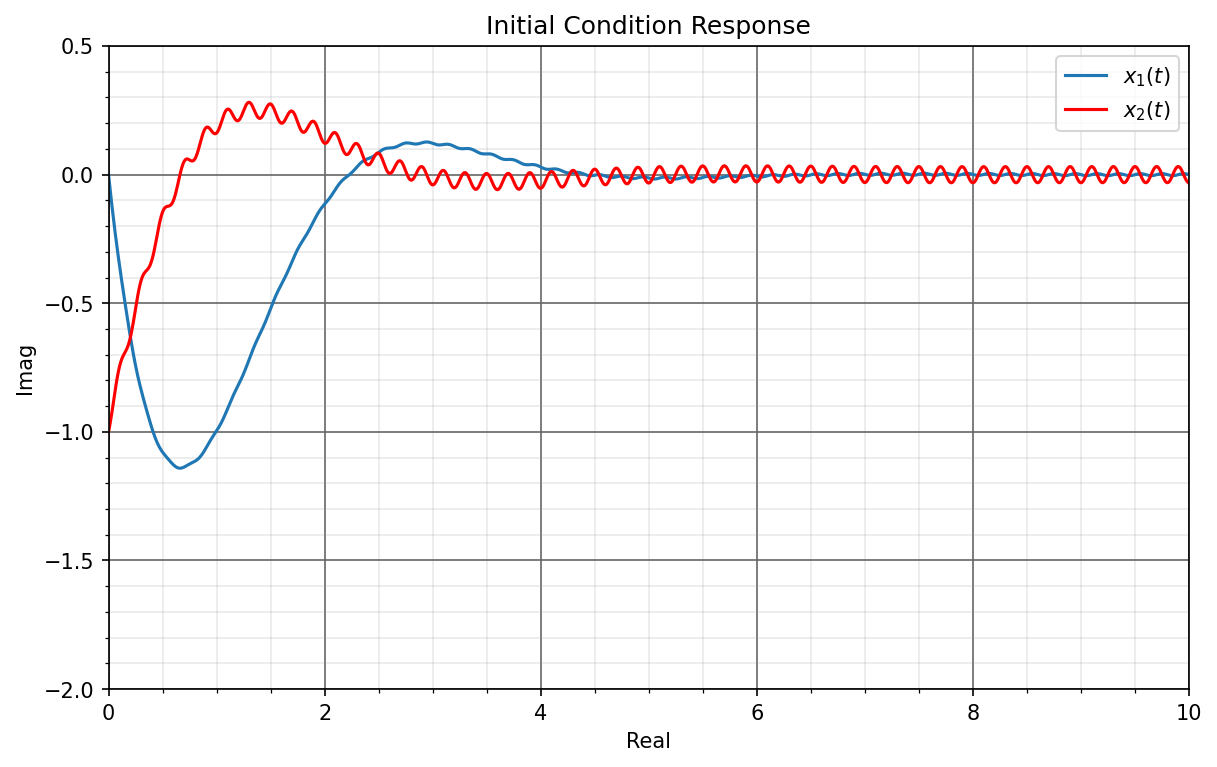

In [41]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()


(0.01, 100)

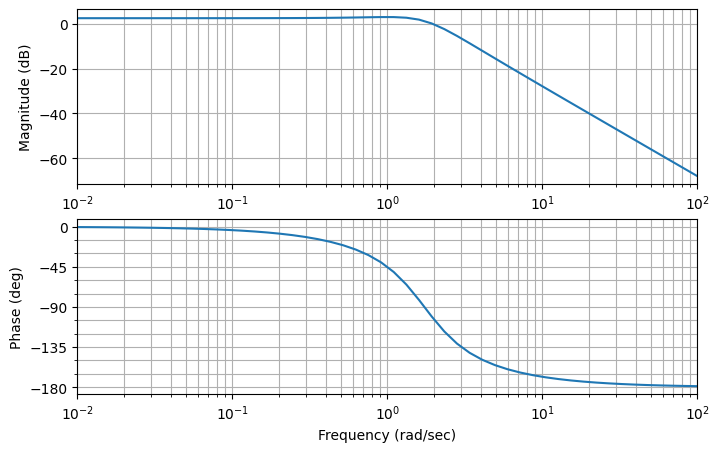

In [42]:
s = tf('s')
P = 4/(s**2 + 2*s + 3)
plt.figure(1,figsize=(8,5))
gain, phase, w = bode(P, logspace(-2,2))
plt.xlim(.01,100)

In [43]:
GM, PM, wpc, wgc = margin(P)
print(f'GM = {20*np.log10(GM):2f}')
print(f'PM = {PM:2f}')
print(f'wpc = {wpc:2f}')
print(f'wgc = {wgc:2f}')


GM = inf
PM = 78.047144
wpc = nan
wgc = 1.956637


In [46]:
# Symmetric root locus

def srl(P, plot_range = 6, klim = 5):
    k = P.num[0][0][0]/P.den[0][0][0]
    z = P.zero()
    p = P.pole()
    n = len(p)
    m = len(z)
    if ((n-m) % 2 == 0):
        Pol = zpk2tf(-z, -p, k)
    else:
        Pol = zpk2tf(-z, -p, -k)
    Pol = tf(Pol[0],Pol[1])
    PPol = Pol * P

    krange = np.logspace(-klim/2, klim, num=10000)
    rlist, klist = rlocus(PPol, kvect=krange, plot=False)
    plt.figure(1,figsize=(8,5))    
    plt.plot([-plot_range, plot_range],[0,0],'k-')
    plt.plot([0,0],[-plot_range, plot_range],'k-')
    plt.xlim([-plot_range, plot_range])
    plt.ylim([-plot_range, plot_range])
    
    plt.xlabel('Real')
    plt.ylabel('Imag')
    for kk in range(rlist.shape[1]):
        plt.plot(rlist[:,kk].real,rlist[:,kk].imag,'b-',lw=6)
    plt.plot(p.real,p.imag,'rx',ms=12,label='Poles')
    plt.plot(-p.real,-p.imag,'cx',ms=12,label='reflected Poles')
    plt.plot(z.real,z.imag,'go',ms=12,label='Zeros')
    plt.plot(-z.real,-z.imag,'co',ms=12,label='reflected Zeros')
    plt.legend(loc='best')
    nicegrid()
    plt.show()


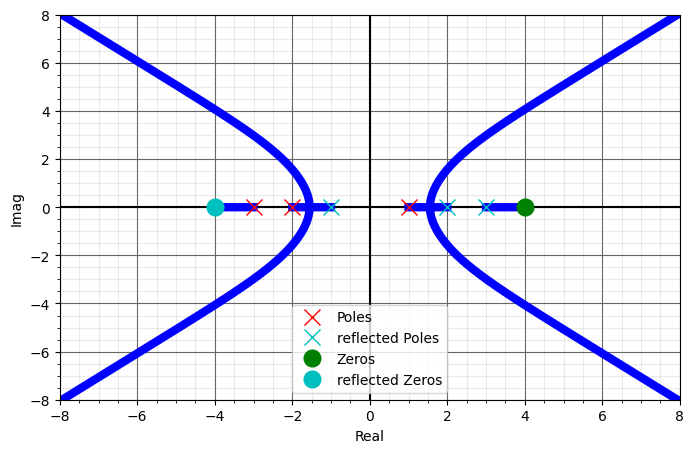

In [45]:
s = tf('s')
P = -(-s+4)/((-s**2 - 2*s + 3)*(-s-2))
P
srl(P, plot_range = 8)